In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
sns.set(style="darkgrid")
plt.rcParams.update({'font.size': 8})


In [2]:
hybrid_trials = []

In [3]:
f = open('./data/hybrid_behavior_cloning/rewards.pkl', 'rb')
hybrid_data = pickle.load(f, encoding="bytes") 

hybrid_rewards = []
for _ep, reward in hybrid_data[b'reward']:
    if reward > -5.:
        reward -= 100
    hybrid_rewards.append(reward)
hybrid_trials.append(hybrid_rewards)

In [4]:
f = open('./data/hybrid_behavior_cloning/rewards2.pkl', 'rb')
hybrid_data = pickle.load(f, encoding="bytes") 

hybrid_rewards = []
for _ep, reward, done, human_intervention in hybrid_data[b'reward']:
    if human_intervention:
        reward -= 100
#     if reward > -25:
#         reward -= 100.
    hybrid_rewards.append(reward)
hybrid_trials.append(hybrid_rewards)

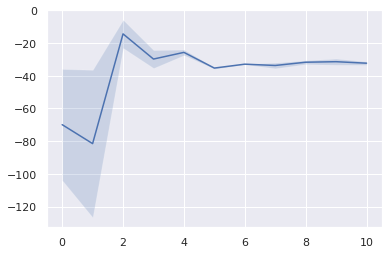

In [5]:
plt.plot([x for x in range(11)], np.mean(hybrid_trials, axis=0))
plt.fill_between([x for x in range(11)],
                np.min(hybrid_trials, axis=0),
                np.max(hybrid_trials, axis=0),
                alpha = 0.2
                )

In [6]:
bc_trials = []

In [7]:
f = open('./data/behavior_cloning/rewards.pkl', 'rb')
bd_data = pickle.load(f, encoding="bytes") 

bc_rewards = []
for episode, reward, done, intervention in bd_data[b'reward']:
    if intervention:
        reward -= 100.
    if reward > -5:
        reward -= 100.
    bc_rewards.append(reward)
bc_trials.append(bc_rewards)

In [8]:
f = open('./data/behavior_cloning/rewards2.pkl', 'rb')
bd_data = pickle.load(f, encoding="bytes") 

In [9]:
bc_rewards = []
for episode, reward, done, intervention in bd_data[b'reward']:
    if intervention:
        reward -= 100.
    if reward > -5:
        reward -= 100.
    bc_rewards.append(reward)
bc_trials.append(bc_rewards)

In [10]:
f = open('./data/behavior_cloning/rewards3.pkl', 'rb')
bd_data = pickle.load(f, encoding="bytes") 

In [11]:
bc_rewards = []
for episode, reward, done, intervention in bd_data[b'reward']:
    if intervention:
        reward -= 100.
    if reward > -5:
        reward -= 100.
    bc_rewards.append(reward)
bc_trials.append(bc_rewards)

In [12]:
f = open('./data/behavior_cloning/rewards4.pkl', 'rb')
bd_data = pickle.load(f, encoding="bytes") 

In [13]:
bc_rewards = []
for episode, reward, done, intervention in bd_data[b'reward']:
    if intervention:
        reward -= 100.
    if reward > -5:
        reward -= 100.
    bc_rewards.append(reward)
bc_rewards = bc_rewards + [bc_rewards[-1]]*2
# bc_rewards.append(bc_rewards[-1])    
bc_trials.append(bc_rewards)

In [14]:
for t in bc_trials:
    print(len(t))

11
11
11
11


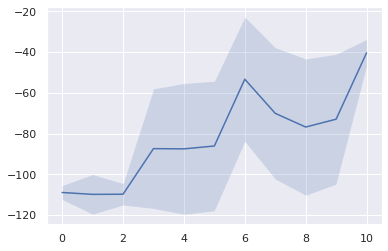

In [15]:
plt.plot([x for x in range(11)], np.mean(bc_trials, axis=0))
plt.fill_between([x for x in range(11)],
                np.mean(bc_trials, axis=0)-np.std(bc_trials, axis=0),
                np.mean(bc_trials, axis=0)+np.std(bc_trials, axis=0),
                alpha = 0.2
                )

In [16]:
bc_mean = np.mean(bc_trials, axis=0)
bc_std = np.std(bc_trials, axis=0)
hlt_mean = np.mean(hybrid_trials, axis=0)
hlt_std = np.std(hybrid_trials, axis=0)

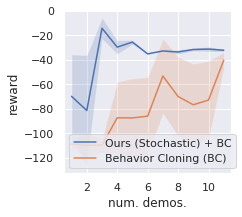

In [18]:
ax = plt.figure(figsize=(3,3)).gca()
x = [i+1 for i in range(11)]

plt.plot(x, hlt_mean, label='Ours (Stochastic) + BC')
plt.fill_between(x,
                hlt_mean - hlt_std,
                hlt_mean + hlt_std,
                alpha = 0.2
                )

plt.plot(x, bc_mean, label='Behavior Cloning (BC)')
plt.fill_between(x,
                bc_mean - bc_std,
                bc_mean + bc_std,
                alpha = 0.2
                )

plt.xlabel('num. demos.')
plt.ylabel('reward')
plt.legend()

ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.savefig('block_stack_results.pdf')